# Lab - NLP Pipeline

## Lab Summary:

In this lab we will be discussing about NLP pipelines.
## Lab Goal:
Upon completion of this lab, the student should be able to:
<ul>
    <li> design a simple NLP pipeline for a problem statement </li>
    
</ul>


## Time Requried:
This lab should take 2 hours to complete for those unfamiliar with the tools.
Hint: The lab flow is already prepared for you, just read through the links and try implementing them. Don't try to have it all figured out before starting.

## Lab Preparation:
<ul>
    <li> Review Lecture for Week 7</li>
</ul>

## Hardware Needed:
Any computer with access to the internet and web browser



## Import Packages and Classes (Initial)

In this lab we will be using the following libraries:
<ol>
    <li> NLTK </li>
    <li> Pandas </li>
    <li> Matplotlib </li>
    <li> Gensim <li>
</ol>


<b>Matplotlib</b> Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It is completely free and open source.

![Image](https://miro.medium.com/max/1050/1*EsqDYFK-IzGEAm4FyZP0wQ.jpeg)

More here: https://matplotlib.org/stable/index.

<b>Pandas</b> is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

![Image](https://miro.medium.com/max/819/1*Dss7A8Z-M4x8LD9ccgw7pQ.png)

More here: https://pandas.pydata.org/

<b>Gensim</b> supports a variety of other NLP tasks such as: 
- converting words to vectors (word2vec), 
- document to vectors (doc2vec), 
- finding text similarity, and text summarization

![Gensim](https://repository-images.githubusercontent.com/1349775/202c4680-8f7c-11e9-91c6-745fdcbeffe8)

More about Gensim here:
https://pypi.org/project/gensim/

# Dataset

The twenty newsgroup dataset would be used for this lab. It is already loaded in the sklearn library.


![Image](https://research.cs.aalto.fi/pml/software/ne/20newsgroups_wtsne.png)

The dataset contains over 18000 messages with assigned topic labels, and is split into train and test parts. The training dataset contains around 11300 labelled messages and the test dataset contains 7500 messages without label (the task is to predict these labels).

The various categories are:

 - 'alt.atheism',
 -  'comp.graphics',
 -  'comp.os.ms-windows.misc',
 -  'comp.sys.ibm.pc.hardware',
 -  'comp.sys.mac.hardware',
 -  'comp.windows.x',
 -  'misc.forsale',
 -  'rec.autos',
 -  'rec.motorcycles',
 -  'rec.sport.baseball',
 -  'rec.sport.hockey',
 -  'sci.crypt',
 -  'sci.electronics',
 -  'sci.med',
 -  'sci.space',
 -  'soc.religion.christian',
 -  'talk.politics.guns',
 -  'talk.politics.mideast',
 -  'talk.politics.misc',
 -  'talk.religion.misc'


# Data Preprocessing

Preprocessing text can be used to remove stopwords,punctuations from the text data as they have no sentimental value.

In [6]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier


In [7]:
from sklearn.datasets import fetch_20newsgroups

categories = [
    "comp.graphics",
    "rec.sport.hockey",
    "sci.space",
    "talk.politics.misc"
]

twenty_train = fetch_20newsgroups(
    subset="train",
    categories=categories,
    shuffle=True,
    remove=("headers", "footers", "quotes")
)

print(f"Loaded {len(twenty_train.data)} documents")


Loaded 2242 documents


See all the categories like this:

In [8]:
twenty_train.target_names #prints all the categories

['comp.graphics', 'rec.sport.hockey', 'sci.space', 'talk.politics.misc']

In [9]:
print("\n".join(twenty_train.data[0].split("\n")[:3])) #prints first line of the first data file

Pascal Perret, in article <1993Apr21.125750.263@eicn.etna.ch>, wrote

Funny thing, the InterNet: I have no idea what xv221 might be - except that it


Now, let us obtain the <b>bag of word</b> features from the text.

More about fit_transform function: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
#your code here. 
#Fit the data to CountVectoriser and store it in a variable X_train_counts, and print the shape 
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2242, 28969)

Now, let us obtain the <b>tfidf</b> features from the text.

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
#your code here. 
#Fit the data to TfidfTransformer and store it in a variable X_train_counts, and print the shape 
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2242, 28969)

Now, we will use the Naive Bayes classifier to classify text. It is also available in the sklearn library.

#Naive Bayes Classifier

![Image](https://insightimi.files.wordpress.com/2020/04/unnamed-1.png)

More here: https://www.youtube.com/watch?v=O2L2Uv9pdDA



In [12]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

The Pipeline function is available in the Sklearn library. It takes the different steps of the pipeline one by one:

- ('vect', CountVectorizer()),

- ('tfidf', TfidfTransformer()),

- ('clf', MultinomialNB())

In [13]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])

In [14]:
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)


In [15]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np

categories = [
    "comp.graphics",
    "rec.sport.hockey",
    "sci.space",
    "talk.politics.misc"
]

twenty_test = fetch_20newsgroups(
    subset="test",
    categories=categories,
    shuffle=True,
    remove=("headers", "footers", "quotes")
)

predicted = text_clf.predict(twenty_test.data)

accuracy = np.mean(predicted == twenty_test.target)
print(f"Accuracy: {accuracy:.2%}")


Accuracy: 86.93%


#SVM 

Now, let's see how SVM does with our data

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.

![Image](https://miro.medium.com/max/921/1*06GSco3ItM3gwW2scY6Tmg.png)

More about SVM: https://scikit-learn.org/stable/modules/svm.html, https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/#:~:text=A%20support%20vector%20machine%20(SVM,able%20to%20categorize%20new%20text.

You are given the following chronological steps of the pipeline:

- ('vect', CountVectorizer())
- ('tfidf', TfidfTransformer())
- ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))

Now, your task is to design the <b>pipeline</b>

In [16]:
from sklearn.linear_model import SGDClassifier
#your code here
#design the pipeline and store it in a variable text_clf_svm
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=50, random_state=42))])



In [17]:
text_clf_svm = text_clf_svm.fit(twenty_train.data, twenty_train.target)
#Now predict the labels for twenty_test data
#use the function text_clf_svm.predict, the test data can be referenced by twenty_test.data 
#your code here 
predicted_svm = text_clf_svm.predict(twenty_test.data)
#prediction accuracy
#your code here
np.mean(predicted_svm == twenty_test.target)

np.float64(0.8753351206434317)

#Random Forest

The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

More about Random forests: https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/

![Image](https://onestopdataanalysis.com/wp-content/uploads/2020/01/2-Most-Use-for-Random-Forest-748x421.png)

In [18]:
from sklearn.ensemble import RandomForestClassifier
#your code here 
#design the pipeline: Countvectorizer, tfidftransformer, Randomforestclassifier
text_clf_randomforest = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),('clf', RandomForestClassifier())])


In [19]:
#Find the randomforest classifier accuracy
#your code here
text_clf_randomforest = text_clf_randomforest.fit(twenty_train.data, twenty_train.target)
predicted_randomforest = text_clf_randomforest.predict(twenty_test.data)
np.mean(predicted_randomforest == twenty_test.target)

np.float64(0.8183646112600537)

#Decision tree

Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

More here: https://www.geeksforgeeks.org/decision-tree/

![Image](https://media.geeksforgeeks.org/wp-content/cdn-uploads/Decision_Tree-2.png)

In [20]:
from sklearn.tree import DecisionTreeClassifier
#your code here 
#design the pipeline: Countvectorizer, tfidftransformer, Decision tree classifier
text_clf_decisiontree = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),('clf', DecisionTreeClassifier())])


In [21]:
#Find the decision tree classifier accuracy
#your code here
text_clf_decisiontree = text_clf_decisiontree.fit(twenty_train.data, twenty_train.target)
predicted_decisiontree = text_clf_decisiontree.predict(twenty_test.data)
np.mean(predicted_decisiontree == twenty_test.target)

np.float64(0.688337801608579)

## Submission Instructions

    Run all code cells

    Answer all questions in markdown cells under each section

    Export as HTML: File → Download as → HTML (.html)

    Submit the HTML file in Canvas by the posted deadline

## Setup
### Run the following cell before starting the assignment:

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"  # For clean HTML export

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from wordcloud import WordCloud

print("All set! Let's build some pipelines.")

All set! Let's build some pipelines.


### Part 1: Word Cloud Exploration (15 points)

Visualize the news headlines using a word cloud.

Answer the following in markdown cells:

    1. List the top 10 most prominent words you see.

    2. What themes appear most common in Australian news during this period?

    3. Why are word clouds useful at the start of an NLP project?

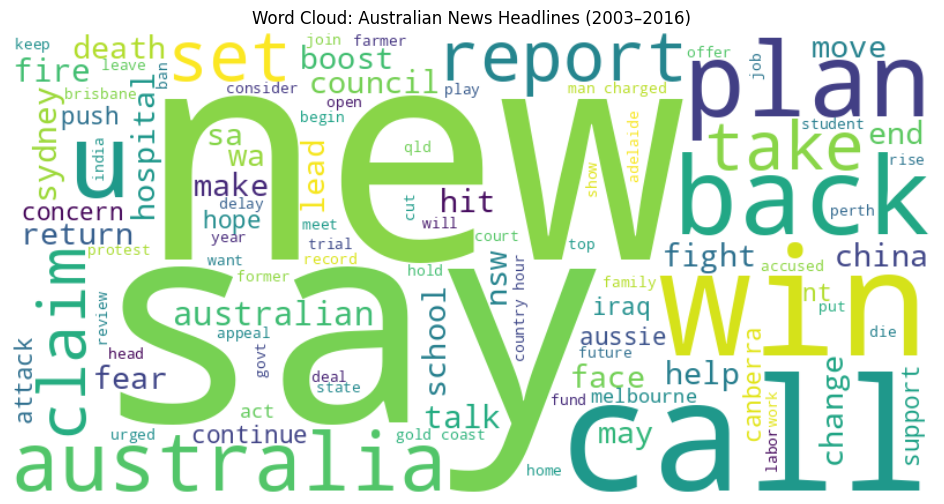

In [23]:
# Load news headlines
news = pd.read_csv('abcnews-date-text.csv')
text = ' '.join(news['headline_text'].astype(str))

# Generate word cloud
wc = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Australian News Headlines (2003–2016)')
plt.show()

### 1. 
The most prominment words I see are
- New
- Call
- Say
- Back
- Win
- Plan
- Australia
- china
- talk
- sydney
### 2. 
During this period it seems to be a re-newed focus on Australia with some overlook to other countries. Within the focus on itself it seems to be about discussion & action, with it conflicting resulting in winning.

### 3. 
Wordcloud can give a few quick, visual understands of the dataset like that of
- The general content of terms to expect to work with.
- A general synopsis of the characture of the corpus; what sort of notions & concepts might be floating around within.
- Possible sentiment that could be within the corpus.


### Part 2: Topic Classification Pipeline on News Headlines (40 points)
You will classify headlines into simplified topic categories using keyword-based labeling and then compare two pipelines.



In [24]:
# Step 1 Create Topic Labels

def label_topic(headline):
    h = headline.lower()
    if any(word in h for word in ['police', 'court', 'charged', 'murder', 'jail']):
        return 'Crime'
    elif any(word in h for word in ['government', 'minister', 'opposition', 'labor', 'coalition']):
        return 'Politics'
    elif any(word in h for word in ['win', 'lose', 'match', 'final', 'champion']):
        return 'Sports'
    elif any(word in h for word in ['fire', 'bushfire', 'flood', 'storm']):
        return 'Disaster'
    else:
        return 'Other'

news['topic'] = news['headline_text'].apply(label_topic)
news['topic'].value_counts()

topic
Other       857282
Crime        75873
Sports       53826
Disaster     33755
Politics     27839
Name: count, dtype: int64

In [25]:
#Step 2 Build and Compare 2 Pipelines

# Prepare data
X = news['headline_text']
y = news['topic']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline 1: CountVectorizer + Naive Bayes
pipeline_nb = Pipeline([
    ('vect', CountVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('clf', MultinomialNB())
])

# Pipeline 2: TF-IDF + Logistic Regression
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train and evaluate
for name, pipe in [("Naive Bayes (BoW)", pipeline_nb), ("Logistic Regression (TF-IDF)", pipeline_lr)]:
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(classification_report(y_test, y_pred))


Naive Bayes (BoW) Accuracy: 0.955
              precision    recall  f1-score   support

       Crime       0.90      0.96      0.93     15175
    Disaster       0.97      0.49      0.65      6751
       Other       0.96      0.99      0.98    171456
    Politics       1.00      0.75      0.85      5568
      Sports       0.98      0.75      0.85     10765

    accuracy                           0.96    209715
   macro avg       0.96      0.79      0.85    209715
weighted avg       0.96      0.96      0.95    209715


Logistic Regression (TF-IDF) Accuracy: 0.988
              precision    recall  f1-score   support

       Crime       1.00      0.99      1.00     15175
    Disaster       0.97      0.72      0.83      6751
       Other       0.99      1.00      0.99    171456
    Politics       1.00      0.99      1.00      5568
      Sports       1.00      0.97      0.98     10765

    accuracy                           0.99    209715
   macro avg       0.99      0.94      0.96    209

Answer the following in markdown cells:

1. Which pipeline performs better? Why do you think that is?
To figure out which pipeline had preformed better then the other, I have to look into what makes such a pipeline 'beteter'. On face value the several test scores show that for each metrix within TF-IDF has a greater amount of 1.00 spikes where it seems to overall have a greater amount of accuracy of Naive Bayes: but what are those metrics and how do they prove or disprove this assisgnment?

       - $IoU = \frac{B_{pt}\intersect B_{gt}}{B_{pt}\union B_{gt}}$ where the first term is predicted bounding box and the latter ground truth. -- Intersection over Union.   
       - $\frac{TP}{TP+FP}$ as preceision where TP is true positive & FP as false positive. 
       - $\frac{TP}{P}$ as recall where P is the number of positive examples
         above would all be for object detection
       - In the area of matching alogrithms, which I am due to what I'm using in the pipeline
       - Thresholding is often used in the matching algos
         High thresho gives greater FP but to low then to many FN 
       - Precision is used in document retrival instead of PPV (positive preditice value), and Recall is used instead of TPR  
       - Both precision and recall can be combined into the F-Score, being the harmonic mean.
       - Seems to be a sort of classifiction with a threshold (?) 


So to answer the question above, I think it to be wise to look at the metrics as an extension of that of recall & precision, where both are a replacement for that of PPV & TPR as we're dealing with NLP here. The formula for precision & recall is expressed as,
    - $\frac{TP}{TP+FP}$
    - $\frac{TP}{P}$
where TP is true positive; FP is false positive; and P is all positive examples. This would mean that I can compaire the two metric set by that of the denominator: if the ratio is to be a whole one, this would mean there is a low amount of either TP, FP or  both for preceision; likewise there would be a low amount of positive examples for recall; in either case, such a denominator can increase for a greater amount of classifiction values. Here it could be that the pipeline using TF-IDF has less amount of False Positives then that of the Naive Bayes pipeline which is indicative of better preformance due to higher True Positive classifications.   

2. Based on the classification report, which topic is hardest to predict? Explain.
In both pipelines the topic of Disaster seems to have the lowest metrics compaired to the other topics. This would mean that in both cases there may have been a greater amount of False Positives and a lesser amount of True Positives for this topic simliarity. Generally there could be a tough differitation between that of topics around Disaster and that of ones like Crime & politics; as well Disasters are often a bit more rarer of a event then something like Crime or Politices.

3. Modify one vectorizer to use bigrams: ngram_range=(1,2). Did accuracy improve? Why or why not?
Doing this to the pipeline of Count Vectoriztion & Naive Bayes seems to have average out the preformance around %90, with it taking a hit in recall for the troubled topic of Disaster. Increasing the bigram range to included another term within it's phrase leads to a greater amount of features (vocabulary) which can result in greater density of similiarity found between terms which helps to expalined the general preforamnce increase. The further loss of the troubled term Disestar could be the already existing problem of it's classification intensified through a denser amount of False Negative similarites. 
       


## Part 3: Medical Diagnosis Pipeline (35 points)
In this section, you will use the breast cancer dataset (data.csv). For demonstration, you will create a simple text field from a few numeric feature values and build a classifier using an NLP pipeline.

Answer the following in markdown cells:

    1. Even with artificial text, how well did the model perform? Why might this be the case?

    2. In real healthcare settings, how could NLP pipelines applied to doctor notes improve workforce efficiency?

In [18]:
cancer = pd.read_csv('data.csv')
cancer['diagnosis'] = cancer['diagnosis'].map({'M': 'Malignant', 'B': 'Benign'})

# Create simple "doctor notes" from selected features (for illustration)
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
cancer['notes'] = cancer[features].apply(
    lambda row: ' '.join([f"{col.split('_')[0]} is {row[col]:.1f}" for col in features]),
    axis=1
)

X = cancer['notes']
y = cancer['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

pipeline_med = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

pipeline_med.fit(X_train, y_train)
y_pred = pipeline_med.predict(X_test)

print(f"Medical Notes Classification Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred))

Medical Notes Classification Accuracy: 0.836
              precision    recall  f1-score   support

      Benign       0.79      1.00      0.88       107
   Malignant       1.00      0.56      0.72        64

    accuracy                           0.84       171
   macro avg       0.90      0.78      0.80       171
weighted avg       0.87      0.84      0.82       171



### 1.
Even with artificial text, how well did the model perform? Why might this be the case?
It would seem that the model performed pretty well for artifical text, but the lower amount of support might indicate why this is. A lower amount of support can help to show that the data which the model had a chance to learn & test against was low; this could cause issues where a single False Positive could swing the other metrics to much lower values, showing that the model hasn't learned to classify such features yet. 


### 2.
In real healthcare settings, how could NLP pipelines applied to doctor notes improve workforce efficiency?

One example could be the instantionus sharing of paitent related notes without having to worry about general form structure. This would enable pracitioners to have greater control of their note syle/structure while having it translated to a proper format for sharing later or idmedtitly witin the system.

## Part 4: Reflection — AI for Workforce (10 points)

Answer briefly in markdown cells:

    1. Provide two examples of how NLP pipelines like these can improve productivity in business, healthcare, or scientific research.

    2. What is the biggest advantage of using scikit-learn Pipeline objects when building NLP systems?

### 1.
The above example of a medical diagnosis simple pipeline is a great first exmaple. Such a pipeline would be able to find possible correlation between those measurment taken from paitents and that of classification standards, giving oppurntity for futher EDA. Another could be that of a kiosk selection of items in busy, high demand enviroments like that of ice cream stores; customers could have their desired flavours (features) mapped with flavour classificaiton. 

### 2.
It provides a sort of simple template for the constructing of such NLP pipelines; conversely the manual creation can often result in a larger amount of project overhead and surface complexity. 
